
Training with learning rate: 0.1
  Episode 10000 complete
  Episode 20000 complete
  Episode 30000 complete
  Episode 40000 complete
  Episode 50000 complete

Training with learning rate: 0.3
  Episode 10000 complete
  Episode 20000 complete
  Episode 30000 complete
  Episode 40000 complete
  Episode 50000 complete

Training with learning rate: 0.5
  Episode 10000 complete
  Episode 20000 complete
  Episode 30000 complete
  Episode 40000 complete
  Episode 50000 complete

Training with learning rate: 0.7
  Episode 10000 complete
  Episode 20000 complete
  Episode 30000 complete
  Episode 40000 complete
  Episode 50000 complete

Training with learning rate: 0.9
  Episode 10000 complete
  Episode 20000 complete
  Episode 30000 complete
  Episode 40000 complete
  Episode 50000 complete


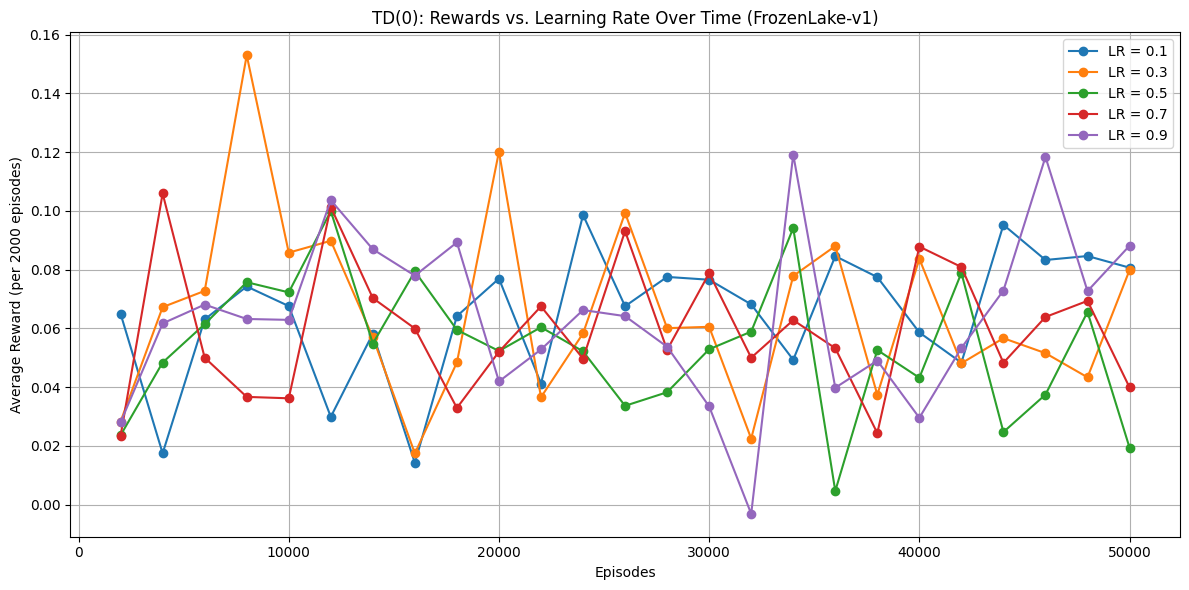

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Environment Setup
env = gym.make('FrozenLake-v1', is_slippery=True)
state_space = env.observation_space.n

# Global Parameters
episodes = 50000
group_size = 2000
num_groups = episodes // group_size
epsilon_decay_rate = 0.0005
min_epsilon = 0.01
discount_factor = 0.99
learning_rates = [0.1, 0.3, 0.5, 0.7, 0.9]

# TD(0) update
def update_value_function(V_table, state, reward, next_state, learning_rate, discount_factor):
    target = reward + discount_factor * V_table[next_state]
    V_table[state] += learning_rate * (target - V_table[state])

# Store grouped rewards for each LR
lr_grouped_rewards = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    V_table = np.zeros(state_space)
    epsilon = 1.0
    rewards_per_episode = []

    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            # Follow a random policy for evaluation purposes
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = env.action_space.sample()  # Still random; not a control algorithm

            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            reward = -0.01 if reward == 0 else 10  # Reward shaping

            update_value_function(V_table, state, reward, next_state, lr, discount_factor)
            state = next_state
            total_reward += reward

        epsilon = max(min_epsilon, epsilon * np.exp(-epsilon_decay_rate * episode))
        rewards_per_episode.append(total_reward)

        if (episode + 1) % 10000 == 0:
            print(f"  Episode {episode + 1} complete")

    # Group rewards into 2000-episode chunks
    grouped_avg = np.mean(np.array(rewards_per_episode).reshape(num_groups, group_size), axis=1)
    lr_grouped_rewards.append(grouped_avg)

# Plotting: Rewards vs Learning Rate Over Time
plt.figure(figsize=(12, 6))
x_vals = np.arange(1, num_groups + 1) * group_size

for i, lr in enumerate(learning_rates):
    plt.plot(x_vals, lr_grouped_rewards[i], marker='o', label=f"LR = {lr}")

plt.xlabel("Episodes")
plt.ylabel("Average Reward (per 2000 episodes)")
plt.title("TD(0): Rewards vs. Learning Rate Over Time (FrozenLake-v1)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [3]:
lr_grouped_rewards

[array([0.064965, 0.0175  , 0.06308 , 0.07428 , 0.067615, 0.029905,
        0.05825 , 0.014245, 0.064195, 0.076965, 0.041255, 0.098615,
        0.067565, 0.077535, 0.076575, 0.06819 , 0.049325, 0.084605,
        0.07747 , 0.058635, 0.04834 , 0.09527 , 0.0833  , 0.084645,
        0.080685]),
 array([0.02832 , 0.06726 , 0.07278 , 0.15298 , 0.085795, 0.08983 ,
        0.056985, 0.017445, 0.048435, 0.120205, 0.03658 , 0.05831 ,
        0.099325, 0.060095, 0.060555, 0.0225  , 0.077865, 0.08804 ,
        0.037415, 0.083705, 0.048135, 0.056675, 0.05158 , 0.043365,
        0.07985 ]),
 array([0.02365 , 0.048395, 0.061465, 0.07573 , 0.072275, 0.099935,
        0.054845, 0.079415, 0.059495, 0.05232 , 0.06041 , 0.0522  ,
        0.033665, 0.038285, 0.052915, 0.058915, 0.094155, 0.004675,
        0.052645, 0.043215, 0.078905, 0.02474 , 0.03748 , 0.06562 ,
        0.019415]),
 array([0.02351 , 0.105935, 0.05005 , 0.0367  , 0.03622 , 0.101295,
        0.07033 , 0.059975, 0.032935, 0.052065, 0.06751 

In [4]:
comparative_QL = []
for i in range(5):
    comparative_QL.append(sum(lr_grouped_rewards[i])//25)
comparative_QL

[0.0, 0.0, 0.0, 0.0, 0.0]